# Laboratory Five

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy import pi
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram
from qiskit_textbook.problems import grover_problem_oracle
from qiskit.tools.monitor import job_monitor

In [31]:
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
        
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    
    for qubit in range(nqubits):
        qc.x(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

Solutions:
|0111>
|1001>


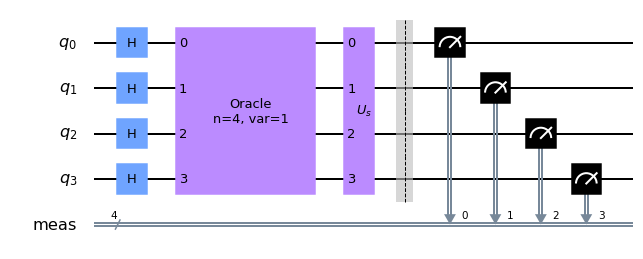

In [34]:
n = 4
oracle = grover_problem_oracle(n, variant=1, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2, 3])
qc.append(oracle, [0,1,2,3])
qc.append(diffuser(n), [0,1,2, 3])
qc.measure_all()
qc.draw('mpl')

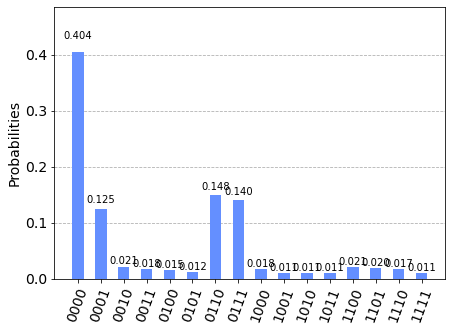

In [35]:
backend = Aer.get_backend('qasm_simulator')

results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts(qc)
plot_histogram(answer)

#### Multiple Iterations

We are still just doing one iteration of the algorithm. We need to have an oracle that requires multiple iterations. By changing the variant to 2, we get the following oracle

Solutions:
|0011>


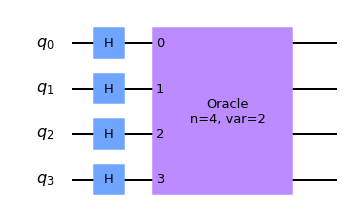

In [18]:
n = 4
oracle = grover_problem_oracle(n, variant=2, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2,3])
qc.append(oracle, [0,1,2,3])
qc.draw('mpl')

Solutions:
|0011>


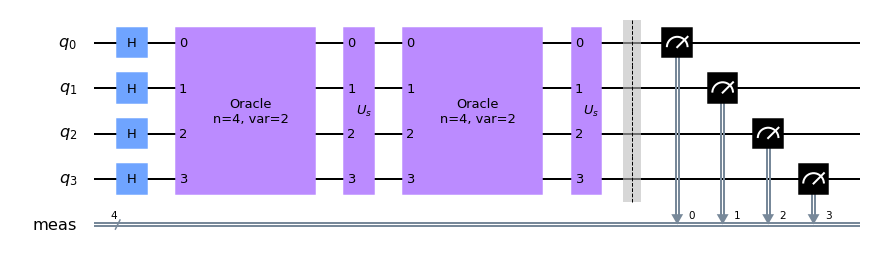

In [19]:
n = 4
oracle = grover_problem_oracle(n, variant=2, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2,3])
qc.append(oracle, [0,1,2,3])
qc.append(diffuser(n), [0,1,2,3])
qc.append(oracle, [0,1,2,3])
qc.append(diffuser(n), [0,1,2,3])
qc.measure_all()
qc.draw('mpl')

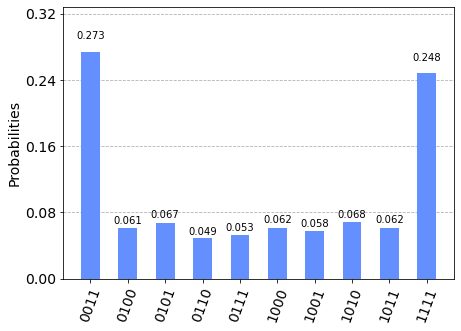

In [20]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

# Laboratory Five

#### Laboratory Activity

The first activity is to use variant=0. You will see that this variant has 1 solution so you will need to use 2 iterations of the algorithm. Cut and Paste the circuit and your plot and add them to your report.

Solutions:
|0111>
|1001>


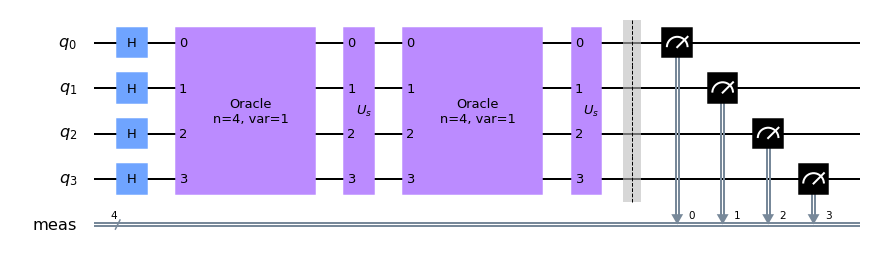

In [43]:
n = 4
oracle = grover_problem_oracle(n, variant=1, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2, 3])
qc.append(oracle, [0,1,2,3])
qc.append(diffuser(n), [0,1,2, 3])
qc.append(oracle, [0,1,2,3])
qc.append(diffuser(n), [0,1,2,3])
qc.measure_all()
qc.draw('mpl')

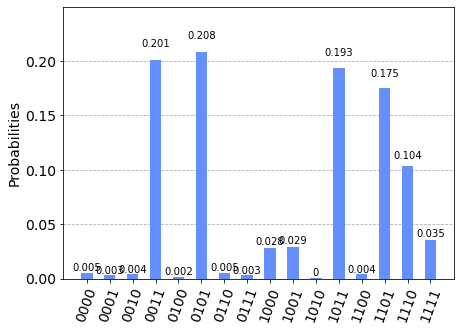

In [44]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

For the second activity create an oracle with 5 qubits and variant 2. This oracle has one solution with 5 qubits. We have √5≈2.24, so 2 iterations probably won’t work. Give this oracle a try with 2 iterations to see if that is enough. If not, go to 3 iterations. Again, cut and paste the circuit and plot into your report.

Solutions:
|00100>


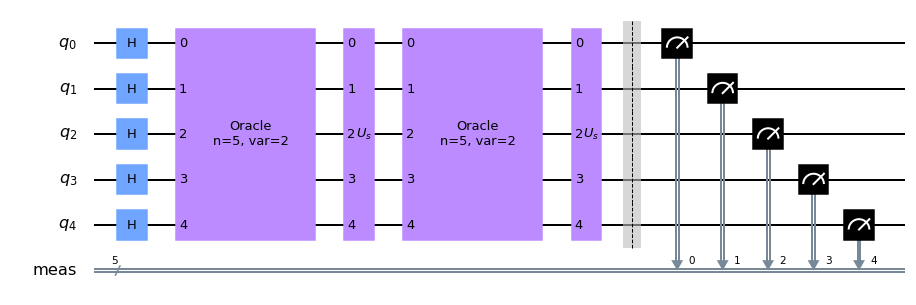

In [51]:
#two iterations
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2,3,4])
qc.append(oracle, [0,1,2,3,4])
qc.append(diffuser(n), [0,1,2, 3,4])
qc.append(oracle, [0,1,2,3,4])
qc.append(diffuser(n), [0,1,2,3,4])
qc.measure_all()
qc.draw('mpl')

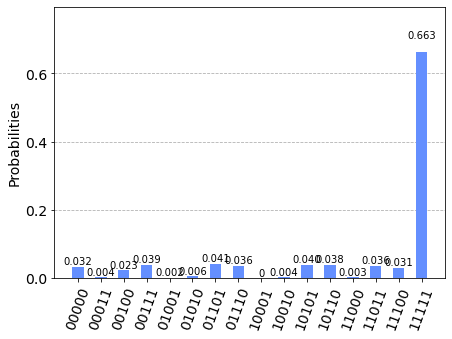

In [53]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

Solutions:
|00100>


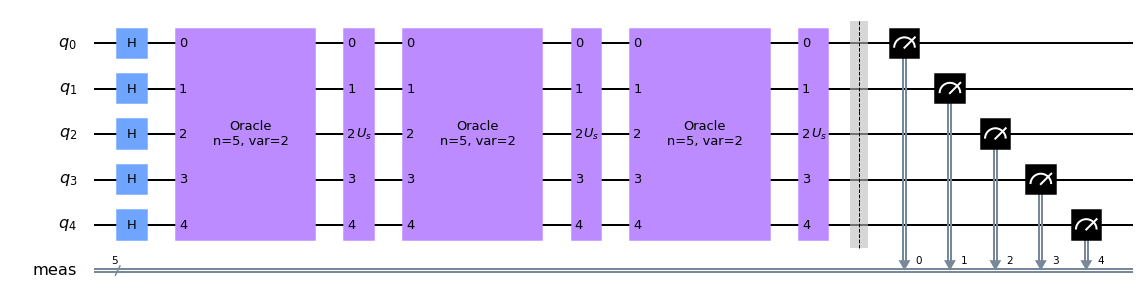

In [55]:
#three iterations
n = 5
oracle = grover_problem_oracle(n, variant=2, print_solutions = True)
qc = QuantumCircuit(n)
qc = initialize_s(qc, [0,1,2,3,4])
qc.append(oracle, [0,1,2,3,4])
qc.append(diffuser(n), [0,1,2, 3,4])
qc.append(oracle, [0,1,2,3,4])
qc.append(diffuser(n), [0,1,2,3,4])
qc.append(oracle, [0,1,2,3,4])
qc.append(diffuser(n), [0,1,2,3,4])
qc.measure_all()
qc.draw('mpl')

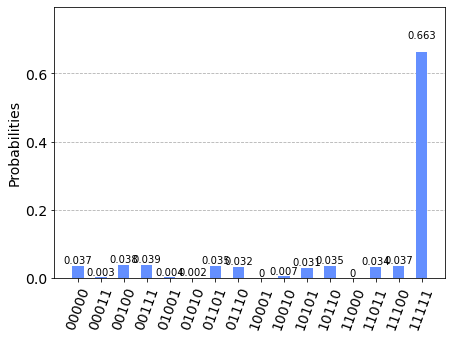

In [56]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)